### 3.4.1 IMDB 데이터셋

IMDB: keras dataset에 있는 인터넷 영화 데이터 베이스


훈련 데이터 긍정 리뷰 __12,500개__, 부정 리뷰 __12,500개__ 총 __25,000개__ 데이터

테스트 데이터 긍정 리뷰 __12,500개__, 부정 리뷰 __12,500개__ 총 __25,000개__ 데이터


모든 데이터 __50,000개__ 이며, 훈련 데이터와 테스트 데이터를 나눈 이유는 같은 데이터로 테스트를 하면 잘 작동한다고 착각할 수 도 있기 때문.

In [11]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

num_words는 훈련 데이터에서 가장 자주 나타나는 단어중 사용할 개수

train_data와 train_labels 그리고 test_data, test_labels 이렇게 훈련용 데이터와 테스트용 데이터를 나눠서 받음. 

추가로 labels은 __부정:0 긍정:1__로 나타냄.

In [12]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [13]:
train_labels[0]

1

In [14]:
max([max(sequence) for sequence in train_data])

9999

num_word를 10,000개로 제한했기 때문에 10,000을 넘지 않는 모습.

In [20]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

imdb.get_word_index: 단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index: word_index에서 key와 value를 바꿈
decoded_review: 디코딩한 리뷰

### 3.4.2 데이터 준비

In [19]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### vectorize_sequences

모든 array를 0으로 초기화 한 뒤, sequences에서 index와 data를 이용해 index, data에 위치하는 값에 1을 넣습니다.

훈련 데이터와 테스트 데이터를 벡터로 변환하는 작업을 진행

In [23]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [24]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

레이블 또한 벡터로 변환

### 3.4.3 신경 모델 만들기

In [29]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

relu라는 네트워크 함수를 사용해 16차원의 신경망 생성

이때 2개의 은닉층을 가지게 구현

마지막에 추가하는 층은 스클라 값 예측을 출력함.

In [34]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])


In [37]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 훈련 검증


In [38]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [47]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 327us/step - loss: 0.1396 - acc: 0.9512 - val_loss: 0.1409 - val_acc: 0.9515
Epoch 2/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.1176 - acc: 0.9608 - val_loss: 0.1568 - val_acc: 0.9428
Epoch 3/20
15000/15000 [==============================] - 3s 188us/step - loss: 0.0957 - acc: 0.9712 - val_loss: 0.1678 - val_acc: 0.9381
Epoch 4/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.0792 - acc: 0.9771 - val_loss: 0.1851 - val_acc: 0.9329
Epoch 5/20
15000/15000 [==============================] - 3s 167us/step - loss: 0.0670 - acc: 0.9803 - val_loss: 0.2036 - val_acc: 0.9261
Epoch 6/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.0534 - acc: 0.9867 - val_loss: 0.2437 - val_acc: 0.9144
Epoch 7/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.0446 - acc: 0.9894 - val_loss: 0.2506 - 

fit() 메소드는 history 객체를 반환하는데 history객체는 딕셔너리 속성을 가지고 있음.

In [40]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

출력된 key값들을 보면, val_loss, val_acc, loss, acc가 있음.

In [21]:
import matplotlib.pyplot as plt

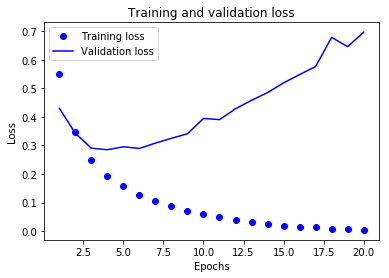

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

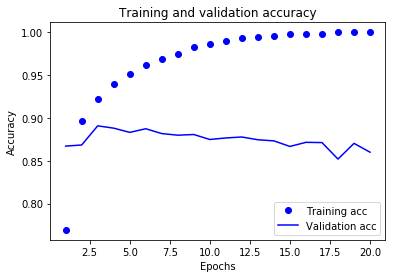

In [43]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

점섬: 훈련 손실과 정확도

실선: 검증 손실과 정확도

3번째쯤에서 최대치를 찍고 감소하는 모습을 보임.
따라서 3번째까지만 훈련을 진행하고 중지하는게 좋음.
이 문제를 과대적합이라함.

In [44]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 121us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 3s 107us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 3s 107us/step - loss: 0.1982 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 6s 253us/step


In [45]:
results

[0.32315899293899536, 0.87352]

결과는 87%의 정확도 달성.

In [46]:
model.predict(x_test)

array([[0.14028221],
       [0.9997028 ],
       [0.2955822 ],
       ...,
       [0.07234907],
       [0.04342631],
       [0.48159987]], dtype=float32)

이제 훈련된 모델로 테스트를 진행함.
0.99 혹은 0.01에 비슷한 값은 확신을 할 수 잇지만 반면에 0.3과 같은 결과값을 보아 모든 테스트에 완벽하게 대응하진 못함.